In [8]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hvand\OneDrive - Umich\Documents\CAI\courseRecommenderSite\atlasSite\Scripts\python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

ModuleNotFoundError: No module named 'seaborn'

In [4]:
# Load the dataset
df = pd.read_csv('data/ExploreBlue feedback.csv')
# Convenience renaming
df.rename(columns={'Please evaluate the response on a simple rating scheme.  5=amazing, 3=useful, 1=useless': 'rating', 'Your role ': 'role'}, inplace=True)
# Goodbye Gus
df.drop(df[df['Your name'] == 'Gus'].index, inplace=True)
df.head()

,Timestamp,Username,Your name,role,What did you ask the bot? (What was your prompt?) Please cut and paste here.,What was the bot's response? Please cut and paste here.,rating,Please explain your rating above.,Anything else you'd like to share?
0,2025/03/05 1:41:28 PM AST,acozad@umich.edu,Alyssa Cozad,Adviser,I am interested in the impact of the aids cris...,"HS 225 (Cross-listed as WGS 212, WOMENSTD 212)...",4,I was very pleased with the range of courses g...,NaN
1,2025/03/05 1:43:15 PM AST,acozad@umich.edu,Alyssa Cozad,Adviser,I am interested in animal behavior and communi...,Error\nFailed to fetch recommendations,1,The bot wasn't able to provide any suggestions,It could be helpful for students to be able to...
2,2025/03/10 10:49:13 AM AST,maiziem@umich.edu,Maizie Jones,Adviser,I want to learn about food around the world,Recommended Courses\nURP 527: Foundations of S...,4,This is a great starting place for students wh...,Here are some thoughts to improve this tool (u...
3,2025/03/11 10:37:04 AM AST,baileed@umich.edu,Bailee Duke,Student,I'm interested in addressing climate change th...,CEE 366: Environmental Engineering Laboratory\...,4,I think it will be helpful for first and secon...,NaN
4,2025/03/12 11:43:37 AM AST,nixonn@umich.edu,Nikye Nixon,Student,I am interested in learning about video game ...,Recommended Courses\nEECS 494: Computer Game D...,5,I asked the bot about my own interests that I ...,This tool is really cool! I think it'd be even...


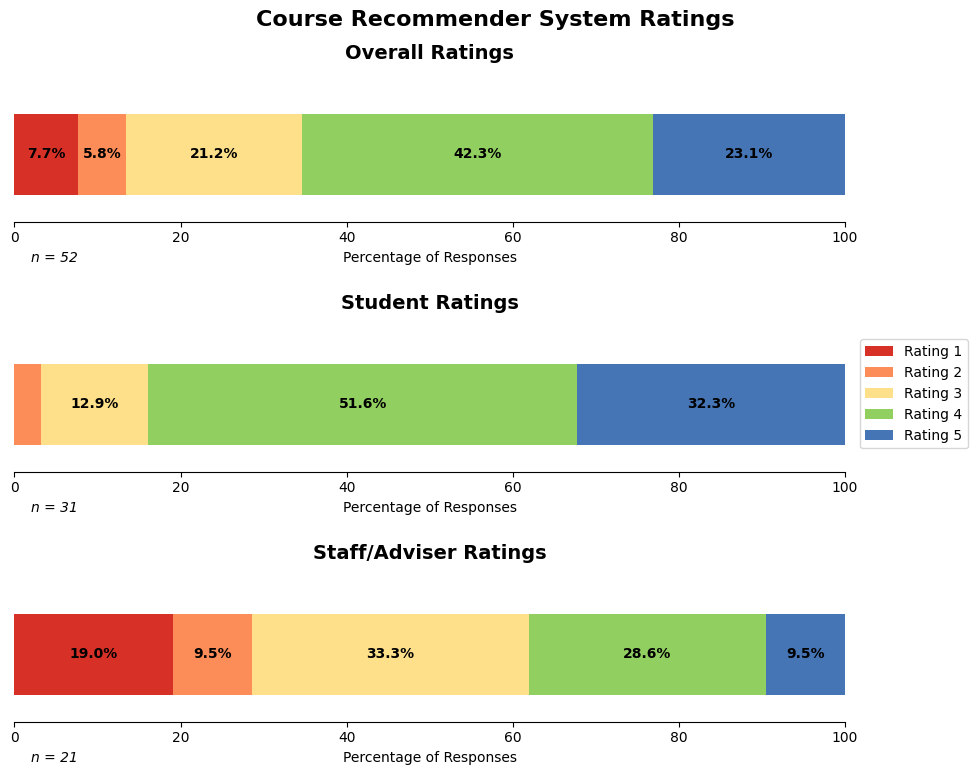

Summary Statistics:

Overall:
  Sample size: 52
  Mean rating: 3.67
  Median rating: 4.0
  Standard deviation: 1.12
  Rating 1: 4 (7.7%)
  Rating 2: 3 (5.8%)
  Rating 3: 11 (21.2%)
  Rating 4: 22 (42.3%)
  Rating 5: 12 (23.1%)

Students:
  Sample size: 31
  Mean rating: 4.13
  Median rating: 4.0
  Standard deviation: 0.75
  Rating 1: 0 (0.0%)
  Rating 2: 1 (3.2%)
  Rating 3: 4 (12.9%)
  Rating 4: 16 (51.6%)
  Rating 5: 10 (32.3%)

Staff/Advisers:
  Sample size: 21
  Mean rating: 3.00
  Median rating: 3.0
  Standard deviation: 1.23
  Rating 1: 4 (19.0%)
  Rating 2: 2 (9.5%)
  Rating 3: 7 (33.3%)
  Rating 4: 6 (28.6%)
  Rating 5: 2 (9.5%)


In [ ]:
# Set style for clean, academic look
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Read the CSV file
df = pd.read_csv('your_google_forms_data.csv')

# Clean the data
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating', 'role'])

def create_clean_rating_plot(data, title, ax):
    """Create a clean horizontal stacked bar chart"""
    
    # Count ratings and calculate percentages
    rating_counts = Counter(data['rating'])
    total_responses = len(data)
    
    ratings = [1, 2, 3, 4, 5]
    counts = [rating_counts.get(i, 0) for i in ratings]
    percentages = [count/total_responses * 100 for count in counts]
    
    # Clean, professional color scheme (diverging)
    colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']
    
    # Create the stacked bar
    left = 0
    bars = []
    for i, (rating, pct, color) in enumerate(zip(ratings, percentages, colors)):
        if pct > 0:
            bar = ax.barh(0, pct, left=left, color=color, 
                         edgecolor='white', linewidth=0.5, height=0.4)
            bars.append(bar)
            
            # Only add text labels for segments > 8% to avoid clutter
            if pct > 8:
                ax.text(left + pct/2, 0, f'{pct:.0f}%', 
                       ha='center', va='center', fontsize=10, 
                       fontweight='bold', color='black')
            
            left += pct
    
    # Clean formatting
    ax.set_xlim(0, 100)
    ax.set_ylim(-0.3, 0.3)
    ax.set_xlabel('Percentage of Responses', fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold', pad=15)
    ax.set_yticks([])
    
    # Remove unnecessary spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Add subtle grid
    ax.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
    # Add sample size annotation
    ax.text(0.98, 0.02, f'n = {total_responses}', 
            transform=ax.transAxes, fontsize=9, 
            ha='right', va='bottom', style='italic', alpha=0.7)
    
    return bars

# Create figure with better proportions
fig, axes = plt.subplots(3, 1, figsize=(12, 7))
fig.suptitle('Course Recommender System Evaluation Results', 
             fontsize=16, fontweight='bold', y=0.98)

# Create plots
bars1 = create_clean_rating_plot(df, 'Overall Ratings (All Participants)', axes[0])

students_df = df[df['role'] == 'Student']
bars2 = create_clean_rating_plot(students_df, 'Student Ratings', axes[1])

others_df = df[df['role'] != 'Student']
bars3 = create_clean_rating_plot(others_df, 'Staff/Adviser Ratings', axes[2])

# Create a clean legend
rating_labels = ['Very Poor (1)', 'Poor (2)', 'Neutral (3)', 'Good (4)', 'Excellent (5)']
colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']

# Add legend outside the plot area
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='white') 
                  for color in colors]
fig.legend(legend_elements, rating_labels, 
          loc='center right', bbox_to_anchor=(1.02, 0.5),
          frameon=False, fontsize=10)

# Adjust layout for clean spacing
plt.tight_layout()
plt.subplots_adjust(right=0.82, top=0.93, hspace=0.4)

# Show plot
plt.show()

# Print clean summary
print("\n" + "="*60)
print("COURSE RECOMMENDER EVALUATION SUMMARY")
print("="*60)

def print_clean_stats(data, group_name):
    ratings = data['rating'].values
    mean_rating = np.mean(ratings)
    
    print(f"\n{group_name.upper()}:")
    print(f"  Sample Size: {len(ratings)}")
    print(f"  Mean Rating: {mean_rating:.2f}/5.00")
    print(f"  Std Deviation: {np.std(ratings):.2f}")
    
    # Satisfaction metrics
    satisfied = len(ratings[ratings >= 4])
    satisfaction_rate = satisfied / len(ratings) * 100
    print(f"  Satisfaction Rate (4-5): {satisfaction_rate:.1f}%")
    
    # Distribution
    rating_dist = Counter(ratings)
    print("  Distribution:")
    for i in range(1, 6):
        count = rating_dist.get(i, 0)
        pct = count/len(ratings) * 100
        print(f"    {i}: {count:2d} responses ({pct:4.1f}%)")

print_clean_stats(df, "Overall")
print_clean_stats(students_df, "Students") 
print_clean_stats(others_df, "Staff/Advisers")

print("\n" + "="*60)

In [10]:
# Run this cell to diagnose your Python environment
import sys
import subprocess

print("Python Environment Diagnostic")
print("=" * 50)

# Check Python executable
print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version}")

# Check Python path
print(f"\nPython path:")
for path in sys.path:
    print(f"  {path}")

# Try to find seaborn
print(f"\nTrying to import seaborn...")
try:
    import seaborn as sns
    print(f"✓ Seaborn imported successfully!")
    print(f"  Seaborn version: {sns.__version__}")
    print(f"  Seaborn location: {sns.__file__}")
except ImportError as e:
    print(f"✗ Failed to import seaborn: {e}")

# Check installed packages
print(f"\nChecking installed packages...")
try:
    result = subprocess.run([sys.executable, '-m', 'pip', 'list'], 
                          capture_output=True, text=True)
    lines = result.stdout.split('\n')
    seaborn_lines = [line for line in lines if 'seaborn' in line.lower()]
    
    if seaborn_lines:
        print("Found seaborn installations:")
        for line in seaborn_lines:
            print(f"  {line}")
    else:
        print("No seaborn found in pip list")
        
except Exception as e:
    print(f"Could not check pip list: {e}")

# Check if we're in a conda environment
print(f"\nEnvironment check:")
conda_env = subprocess.run(['conda', 'info', '--envs'], 
                          capture_output=True, text=True)
if conda_env.returncode == 0:
    print("Conda environments:")
    print(conda_env.stdout)
else:
    print("Not using conda or conda not available")

Python Environment Diagnostic
Python executable: c:\Users\hvand\OneDrive - Umich\Documents\CAI\atlas\atlasSite\Scripts\python.exe
Python version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]

Python path:
  C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\python310.zip
  C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\DLLs
  C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib
  C:\Users\hvand\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0
  c:\Users\hvand\OneDrive - Umich\Documents\CAI\atlas\atlasSite
  
  c:\Users\hvand\OneDrive - Umich\Documents\CAI\atlas\atlasSite\lib\site-packages
  c:\Users\hvand\OneDrive - Umich\Documents\CAI\atlas\atlasSite\lib\site-packages\win32
  c:\Users\hvand\OneDrive - Umich\Documents\CAI\atlas\atlasSite\lib\site-packages\win32\lib
  c:

FileNotFoundError: [WinError 2] The system cannot find the file specified